In [ ]:
## Import bibliotek i wczytanie danych



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Wczytanie danych
df = pd.read_csv("datasets/customer_dataset.csv")

# Podgląd
print("Rozmiar zbioru:", df.shape)
df.head()



Rozmiar zbioru: (8068, 17)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Income_Level,Tech_Savviness,Preferred_Channel,Lifestyle,Annual_Transactions,Avg_Basket_Value,Loyalty_Score
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3500.0,76.0,Social Media,Active,36,23.461652,51.82
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,8000.0,80.0,Online,Family-Oriented,80,89.073631,96.97
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,9600.0,62.0,In-Store,Relaxed,21,77.397617,65.90
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,10300.0,49.0,In-Store,Relaxed,53,177.689155,98.39
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,6600.0,76.0,In-Store,Family-Oriented,105,99.743407,100.00


In [91]:

## Wstępna eksploracja danych

# Sprawdzenie typów danych i uzupełnień
df.info()

# Sprawdzenie braków danych
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8068 non-null   int64  
 1   Gender               8068 non-null   object 
 2   Ever_Married         7928 non-null   object 
 3   Age                  8068 non-null   int64  
 4   Graduated            7990 non-null   object 
 5   Profession           7944 non-null   object 
 6   Work_Experience      7239 non-null   float64
 7   Spending_Score       8068 non-null   object 
 8   Family_Size          7733 non-null   float64
 9   Var_1                7992 non-null   object 
 10  Income_Level         8068 non-null   float64
 11  Tech_Savviness       8068 non-null   float64
 12  Preferred_Channel    8068 non-null   object 
 13  Lifestyle            8068 non-null   object 
 14  Annual_Transactions  8068 non-null   int64  
 15  Avg_Basket_Value     8068 non-null   f

ID                       0
Gender                   0
Ever_Married           140
Age                      0
Graduated               78
Profession             124
Work_Experience        829
Spending_Score           0
Family_Size            335
Var_1                   76
Income_Level             0
Tech_Savviness           0
Preferred_Channel        0
Lifestyle                0
Annual_Transactions      0
Avg_Basket_Value         0
Loyalty_Score            0
dtype: int64

In [92]:
# Przygotowanie słownika z wartościami zastępczymi dla brakujących danych
fill_values = {
    'Work_Experience': df['Work_Experience'].median(),        # uzupełnienie medianą
    'Profession': df['Profession'].mode()[0],                  # uzupełnienie najczęściej występującą wartością
    'Graduated': df['Graduated'].mode()[0],
    'Ever_Married': df['Ever_Married'].mode()[0],
    'Family_Size': df['Family_Size'].mode()[0],
    'Var_1': df['Var_1'].mode()[0]
}

# Uzupełnienie wszystkich braków jednocześnie
df.fillna(value=fill_values, inplace=True)


In [93]:
df.isna().sum()

ID                     0
Gender                 0
Ever_Married           0
Age                    0
Graduated              0
Profession             0
Work_Experience        0
Spending_Score         0
Family_Size            0
Var_1                  0
Income_Level           0
Tech_Savviness         0
Preferred_Channel      0
Lifestyle              0
Annual_Transactions    0
Avg_Basket_Value       0
Loyalty_Score          0
dtype: int64

In [65]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Income_Level,Tech_Savviness,Preferred_Channel,Lifestyle,Annual_Transactions,Avg_Basket_Value,Loyalty_Score
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3500.0,76.0,Social Media,Active,36,23.461652,51.82
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,8000.0,80.0,Online,Family-Oriented,80,89.073631,96.97
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,9600.0,62.0,In-Store,Relaxed,21,77.397617,65.90
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,10300.0,49.0,In-Store,Relaxed,53,177.689155,98.39
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,6600.0,76.0,In-Store,Family-Oriented,105,99.743407,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,3000.0,75.0,Social Media,Adventurous,31,25.768624,49.43
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,2700.0,61.0,In-Store,Family-Oriented,37,27.634718,61.78
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,6200.0,55.0,In-Store,Health-Conscious,34,52.071522,61.33
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,6100.0,62.0,In-Store,Active,30,51.017977,61.84


## Kodowanie zmiennych kategorycznych

Zwykle w klasteryzacji warto zamienić zmienne kategoryczne na *dummy variables* (One-Hot Encoding) lub kod numeryczny (LabelEncoder). W zależności od algorytmu i interpretacji można też zastosować inne metody (np. embeddings). Poniżej przykład konwersji najbardziej kluczowych atrybutów kategorycznych przez LabelEncoder. Jeśli zmienna ma wiele kategorii, można rozważyć One-Hot.


In [66]:
binary_cols = ['Gender', 'Ever_Married', 'Graduated']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [67]:
cat_cols = ['Profession', 'Spending_Score', 'Lifestyle', 'Preferred_Channel', 'Var_1']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [68]:
df

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Income_Level,Tech_Savviness,Annual_Transactions,...,Lifestyle_Health-Conscious,Lifestyle_Relaxed,Preferred_Channel_Online,Preferred_Channel_Social Media,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,0,22,0,1.0,4.0,3500.0,76.0,36,...,False,False,False,True,False,False,True,False,False,False
1,462643,0,1,38,1,1.0,3.0,8000.0,80.0,80,...,False,False,True,False,False,False,True,False,False,False
2,466315,0,1,67,1,1.0,1.0,9600.0,62.0,21,...,False,True,False,False,False,False,False,False,True,False
3,461735,1,1,67,1,0.0,2.0,10300.0,49.0,53,...,False,True,False,False,False,False,False,False,True,False
4,462669,0,1,40,1,1.0,6.0,6600.0,76.0,105,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0.0,7.0,3000.0,75.0,31,...,False,False,False,True,False,False,False,False,False,False
8064,464685,1,0,35,0,3.0,4.0,2700.0,61.0,37,...,False,False,False,False,False,False,True,False,False,False
8065,465406,0,0,33,1,1.0,1.0,6200.0,55.0,34,...,True,False,False,False,False,False,False,False,True,False
8066,467299,0,0,27,1,1.0,4.0,6100.0,62.0,30,...,False,False,False,False,False,False,False,False,True,False


**Uwaga**: Kolumny takie jak `ID` – unikalny identyfikator – zwykle nie wchodzą do klasteryzacji, bo nie niosą użytecznej informacji. Można je zachować do późniejszego odtworzenia segmentów, ale nie jako zmienną objaśniającą.

***

## Przygotowanie cech numerycznych

Kolumny typu: `Age`, `Work_Experience`, `Family_Size`, `Income_Level`, `Tech_Savviness`, `Annual_Transactions`, `Avg_Basket_Value`, `Loyalty_Score` zwykle stosujemy w modelach klasteryzacji. Warto sprawdzić rozkład i skalę, bo k-średnich i hierarchiczne klasteryzacje bazują na metrykach odległości, wrażliwych na różne skale.

**Skalowanie**: Przyjęcie standaryzacji (*mean=0, std=1*):

In [69]:
num_cols = ['Age', 'Work_Experience', 'Family_Size', 'Income_Level',
            'Tech_Savviness', 'Annual_Transactions', 'Avg_Basket_Value', 'Loyalty_Score']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [70]:
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

X = df.values  # Konwersja do numpy array
print("Rozmiar X:", X.shape)


Rozmiar X: (8068, 33)


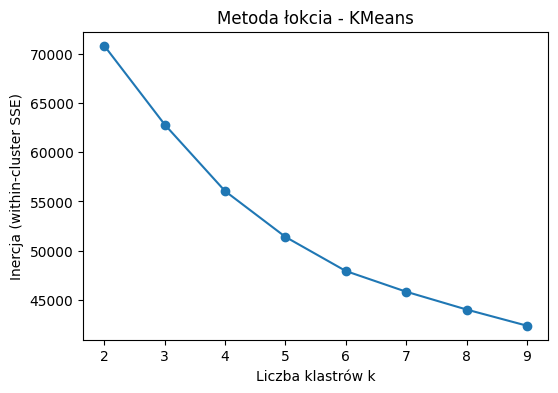

In [71]:
# ## Krok 1: Klasteryzacja k-średnich

# 1. **Określenie liczby klastrów k**: Można użyć tzw. metody łokcia lub silhouette.
# 2. **Uruchomienie algorytmu**.

# **Metoda łokcia (inercja)**:


inertias = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, 'o-')
plt.xlabel("Liczba klastrów k")
plt.ylabel("Inercja (within-cluster SSE)")
plt.title("Metoda łokcia - KMeans")
plt.show()


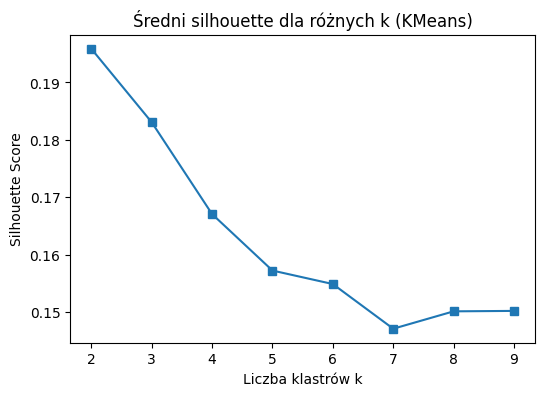

In [72]:
sil_scores = []
for k in K_range:
    km_tmp = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_tmp = km_tmp.fit_predict(X)
    sil = silhouette_score(X, labels_tmp)
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, 's-')
plt.xlabel("Liczba klastrów k")
plt.ylabel("Silhouette Score")
plt.title("Średni silhouette dla różnych k (KMeans)")
plt.show()

In [73]:


best_k = np.argmax(sil_scores) + 2  # bo range startuje od 2
print("Najwyższy silhouette uzyskano dla k =", best_k)


Najwyższy silhouette uzyskano dla k = 2


In [74]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, n_init=10, random_state=42)
cluster_labels_km = kmeans.fit_predict(X)
df['Cluster_kmeans'] = cluster_labels_km  # zachowanie etykiet w oryginalnym DataFrame



In [75]:
silhouette_km = silhouette_score(X, cluster_labels_km)
db_km = davies_bouldin_score(X, cluster_labels_km)
print("Silhouette (k-means):", round(silhouette_km, 3))
print("Davies-Bouldin (k-means):", round(db_km, 3))


Silhouette (k-means): 0.167
Davies-Bouldin (k-means): 1.682


In [76]:
df.groupby('Cluster_kmeans').mean()  # lub .describe()


,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Income_Level,Tech_Savviness,Annual_Transactions,Avg_Basket_Value,...,Lifestyle_Health-Conscious,Lifestyle_Relaxed,Preferred_Channel_Online,Preferred_Channel_Social Media,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
Cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.618024,0.982079,0.008767,0.731183,0.053362,0.281223,-0.029218,0.109074,1.379775,0.359984,...,0.082437,0.049667,0.558116,0.011777,0.054788,0.094726,0.151562,0.011265,0.643113,0.025090
1,0.506967,0.188260,-0.807555,0.446487,0.198460,0.207231,-0.400619,0.651753,-0.482174,-0.548505,...,0.109398,0.004447,0.638008,0.134302,0.070560,0.126001,0.163060,0.016009,0.576045,0.030537
2,0.478495,0.931900,1.614391,0.998208,-0.367158,-0.468797,2.492117,-0.980012,-0.036299,2.579591,...,0.019713,0.501792,0.073477,0.000000,0.023297,0.059140,0.053763,0.003584,0.842294,0.007168
3,0.564560,0.782967,0.826891,0.711996,-0.260416,-0.451754,0.008127,-0.853726,-0.479888,-0.133861,...,0.080586,0.358059,0.244963,0.000000,0.029304,0.081960,0.097527,0.003205,0.753205,0.021520


In [77]:
df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Income_Level,Tech_Savviness,Annual_Transactions,Avg_Basket_Value,...,Lifestyle_Relaxed,Preferred_Channel_Online,Preferred_Channel_Social Media,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Cluster_kmeans
0,1,0,-1.284623,0,-0.451136,0.785536,-0.606363,0.974244,-0.680210,-0.716433,...,False,False,True,False,False,True,False,False,False,1
1,0,1,-0.327151,1,-0.451136,0.122735,1.841037,1.324092,1.741187,1.471492,...,False,True,False,False,False,True,False,False,False,0
2,0,1,1.408268,1,-0.451136,-1.202868,2.711223,-0.250223,-1.505686,1.082139,...,True,False,False,False,False,False,False,True,False,2
3,1,1,1.408268,1,-0.757410,-0.540066,3.091930,-1.387227,0.255330,4.426503,...,True,False,False,False,False,False,False,True,False,2
4,0,1,-0.207467,1,-0.451136,2.111139,1.079624,0.974244,3.116981,1.827291,...,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,-1.284623,0,-0.757410,2.773940,-0.878296,0.886782,-0.955368,-0.639504,...,False,False,True,False,False,False,False,False,False,1
8064,1,0,-0.506677,0,0.161413,0.785536,-1.041456,-0.337684,-0.625178,-0.577276,...,False,False,False,False,False,True,False,False,False,1
8065,0,0,-0.626361,1,-0.451136,-1.202868,0.862077,-0.862456,-0.790273,0.237604,...,False,False,False,False,False,False,False,True,False,3
8066,0,0,-0.985413,1,-0.451136,0.785536,0.807690,-0.250223,-1.010400,0.202472,...,False,False,False,False,False,False,False,True,False,1


In [78]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Income_Level', 'Tech_Savviness', 'Annual_Transactions',
       'Avg_Basket_Value', 'Loyalty_Score', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Lifestyle_Adventurous',
       'Lifestyle_Family-Oriented', 'Lifestyle_Health-Conscious',
       'Lifestyle_Relaxed', 'Preferred_Channel_Online',
       'Preferred_Channel_Social Media', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7',
       'Cluster_kmeans'],
      dtype='object')

In [79]:
df.groupby('Cluster_kmeans')['Spending_Score_High'].mean()


Cluster_kmeans
0    0.359447
1    0.000000
2    0.489247
3    0.110348
Name: Spending_Score_High, dtype: float64


## Krok 2: Klasteryzacja hierarchiczna

**Podejście**: Aglomeracyjne łączenie (metoda Warda). W `scikit-learn`:


In [80]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels_hc = agg.fit_predict(X)
df['Cluster_hier'] = cluster_labels_hc

silhouette_hc = silhouette_score(X, cluster_labels_hc)
db_hc = davies_bouldin_score(X, cluster_labels_hc)
print("Silhouette (hierarchiczna):", round(silhouette_hc, 3))
print("Davies-Bouldin (hierarchiczna):", round(db_hc, 3))

Silhouette (hierarchiczna): 0.16
Davies-Bouldin (hierarchiczna): 1.663


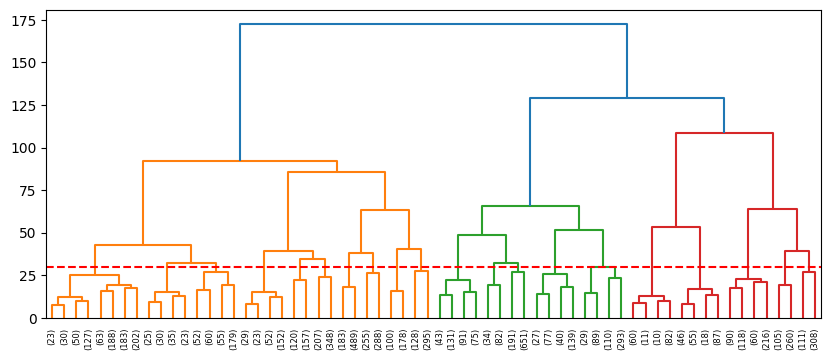

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode='level', p=5)  # np. p=5 -> skrócona wersja dendrogramu
plt.axhline(y=30, c='red', ls='--')
plt.show()


*(Dla dużego zbioru 8068 obserwacji dendrogram będzie trudny do czytania w pełnej wersji.)*

**Analiza segmentów**: Analogicznie jak wcześniej, można przejrzeć `df.groupby('Cluster_hier')` i wyciągnąć wnioski.

* Warto porównać wielkość segmentów, np. `df['Cluster_hier'].value_counts()`.
* Można sprawdzić, czy segmenty hierarchiczne pokrywają się z segmentami k-średnich.
* Jeśli hierarchiczny daje nierównomierne rozmiary klastrów, można spróbować innej metody łączenia (average, complete) lub innej liczby klastrów.



## Krok 3: Klasteryzacja DBSCAN

DBSCAN wymaga doboru `eps` i `min_samples`. Zwykle można zacząć od heurystyki (np. `min_samples=5` lub 10) i *k-distance plot*, by znaleźć *kolanko* w odległościach:

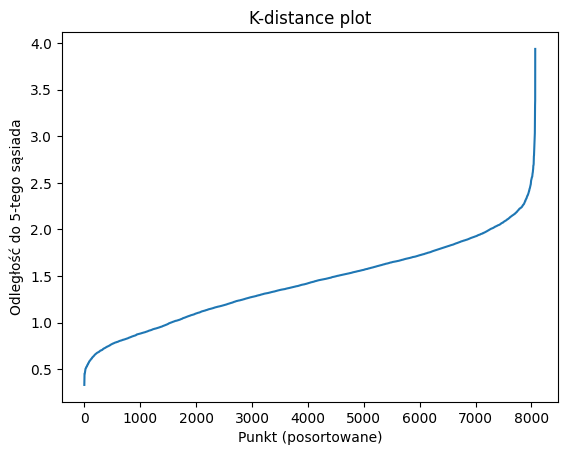

In [82]:
from sklearn.neighbors import NearestNeighbors

neighbors = 5
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances[:, neighbors-1])  # odległość do 5-tego najbliższego sąsiada
plt.plot(distances)
plt.title("K-distance plot")
plt.ylabel("Odległość do 5-tego sąsiada")
plt.xlabel("Punkt (posortowane)")
plt.show()




Na krzywej można próbować odnaleźć miejsce z nagłym „skokiem” odległości, np. `eps ~ 0.5`.

**Implementacja**:


In [83]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_db = dbscan.fit_predict(X)
df['Cluster_dbscan'] = cluster_labels_db

# Liczba klastrów (DBSCAN oznacza noise jako -1)
n_clusters_db = len(set(cluster_labels_db) - {-1})
print(f"DBSCAN wykrył {n_clusters_db} klastrów (plus szum: {(cluster_labels_db==-1).sum()} punktów).")

silhouette_db = silhouette_score(X[cluster_labels_db!=-1], cluster_labels_db[cluster_labels_db!=-1])  if n_clusters_db > 1 else np.nan
db_db = davies_bouldin_score(X[cluster_labels_db!=-1], cluster_labels_db[cluster_labels_db!=-1]) if n_clusters_db > 1 else np.nan

print("Silhouette (DBSCAN):", round(silhouette_db, 3))
print("Davies-Bouldin (DBSCAN):", round(db_db, 3))


DBSCAN wykrył 8 klastrów (plus szum: 8011 punktów).
Silhouette (DBSCAN): 0.554
Davies-Bouldin (DBSCAN): 0.604


In [85]:

# Do testów statystycznych
from scipy.stats import f_oneway, kruskal, chi2_contingency


# =================================================
# 5. Podstawowa analiza statystyczna w segmentach
# =================================================

# Przykład: analizy w klastrach K-means
# --------------------------------------

print("\nAnaliza klastrów K-means (Cluster_kmeans)\n")
print("Średnie wartości wybranych cech numerycznych w poszczególnych klastrach:")
cols_to_describe = ['Age','Income_Level','Loyalty_Score']  # przykładowe
print(df.groupby('Cluster_kmeans')[cols_to_describe].mean())



Analiza klastrów K-means (Cluster_kmeans)

Średnie wartości wybranych cech numerycznych w poszczególnych klastrach:
                     Age  Income_Level  Loyalty_Score
Cluster_kmeans                                       
0               0.008767     -0.029218       1.049292
1              -0.807555     -0.400619      -0.615379
2               1.614391      2.492117       1.438337
3               0.826891      0.008127      -0.355396


In [86]:

# (a) ANOVA / test Kruskal–Wallis do sprawdzenia różnic w Income_Level
#    Zależnie od rozkładu danych wybierzemy jedną z metod.
#    Tu przykład ANOVA:
cluster_groups = [df.loc[df['Cluster_kmeans'] == k, 'Income_Level'] for k in range(k_opt)]
f_stat, p_val = f_oneway(*cluster_groups)
print(f"\nANOVA dla Income_Level wg klastrów k-means: F={f_stat:.3f}, p-value={p_val:.4f}")

# Jeśli p-value < 0.05 -> wnioskujemy, że są istotne różnice w średnim dochodzie między klastrami
# Jeśli dane nie spełniają założeń ANOVA, można użyć kruskal(*cluster_groups).



ANOVA dla Income_Level wg klastrów k-means: F=2654.499, p-value=0.0000


In [87]:

# (b) Chi-square – powiązanie klastrów z Gender (jeśli Gender jest dalej binarne 0/1)
if 'Gender' in df.columns:
    contingency_table = pd.crosstab(df['Cluster_kmeans'], df['Gender'])
    chi2_stat, chi2_p, dof, ex = chi2_contingency(contingency_table)
    print("\nChi-square dla Cluster_kmeans vs Gender")
    print("Tabela krzyżowa:")
    print(contingency_table)
    print(f"Chi2 stat={chi2_stat:.3f}, p-value={chi2_p:.4f}")


Chi-square dla Cluster_kmeans vs Gender
Tabela krzyżowa:
Gender             0     1
Cluster_kmeans            
0                746  1207
1               1663  1710
2                291   267
3                951  1233
Chi2 stat=74.865, p-value=0.0000


In [88]:
# (c) Chi-square – powiązanie klastrów z Profession (o ile została zakodowana w dummies)
prof_cols = [col for col in df.columns if 'Profession_' in col]
if len(prof_cols) > 0:
    # Tworzymy jedną kolumnę: oryginalna 'Profession' (o ile mamy zapisaną)
    # lub sprawdzamy liczbę 1 w dumies – to wymaga innej konstrukcji tablicy.
    # W uproszczeniu można zobaczyć, jaki procent (lub liczba) klientów z 1 w danej kategorii jest w danym klastrze.
    
    print("\nChi-square dla wybranej kolumny Profession_ lub wszystkich naraz (poglądowo).")
    # Jako przykład - sumujemy wartości w danej kolumnie w obrębie klastrów:
    for pc in prof_cols:
        contingency_table = pd.crosstab(df['Cluster_kmeans'], df[pc])
        chi2_stat, chi2_p, dof, ex = chi2_contingency(contingency_table)
        print(f"\nKolumna {pc}:")
        print(contingency_table)
        print(f"Chi2 stat={chi2_stat:.3f}, p-value={chi2_p:.4f}")



Chi-square dla wybranej kolumny Profession_ lub wszystkich naraz (poglądowo).

Kolumna Profession_Doctor:
Profession_Doctor  False  True 
Cluster_kmeans                 
0                   1810    143
1                   2981    392
2                    554      4
3                   2035    149
Chi2 stat=96.820, p-value=0.0000

Kolumna Profession_Engineer:
Profession_Engineer  False  True 
Cluster_kmeans                   
0                     1748    205
1                     3083    290
2                      454    104
3                     2084    100
Chi2 stat=124.518, p-value=0.0000

Kolumna Profession_Entertainment:
Profession_Entertainment  False  True 
Cluster_kmeans                        
0                          1665    288
1                          2953    420
2                           520     38
3                          1981    203
Chi2 stat=44.299, p-value=0.0000

Kolumna Profession_Executive:
Profession_Executive  False  True 
Cluster_kmeans                  